In [1]:
from Scripts import Trainings
from Scripts import Plotting
from Scripts import Computing_functions
import os
import importlib
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
Var_X1 = ['x', 'y', 'thermalDriving', 'halineDriving', 'iceDraft']
Var_X2 = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_non_position = ['temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_BIG = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'Big_T', 'Big_S']
Var_X_Extra = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'temperatureYZ', 'salinityYZ']
Var_X_BIG_test = ['iceDraft','Big_T', 'Big_S']

In [3]:
#def __init__(self, Epoch = 2, Neur_seq = '32_64_64_32', Dataset_train = ['Ocean1'], 
#    Oc_mod_type = 'COM_NEMO-CNRS', Var_X = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft'], 
#    Var_Y = 'meltRate', activ_fct = 'swish', Norm_Choix = 0, verbose = 1, batch_size = 32, Extra_n = '', 
#    Better_cutting = False, Drop = None, Default_drop = 0.5, Method_data = None, Method_extent = [0, 40], 
#    Scaling_lr = False, Scaling_change = 2, Frequence_scaling_change = 8, Multi_thread = False, Workers = 1):

In [4]:
importlib.reload(Trainings)
Training = Trainings.Sequencial_training(Trainings.model_NN)
len(Training.Neur_seq_preview(5))

#class Sequencial_training():
#    def training(self, training_extent = 1, verbose = 1, Verify = 1,
#                 Standard_train = ['32_64_64_32'], **kwargs):
#New Better_cutting Var either False or Same_t 
# Same_t : Cut ocean3-4 to same time size as Ocean1-2

46

In [5]:
Best_Neur = ['32_32_96_96'] #, '96_96_96_96_96', '64_64_64_96_96', '32_32_32_64']
Training.training(training_extent = 0, verbose = 1, batch_size = 128, Exact = 1, message = 1,
            Standard_train = Best_Neur, Dataset_train = OcT, Epoch = 30, 
            Var_X = Var_X_BIG, Verify = 0, Extra_n = 'Same_ind', 
            Similar_training = 1, Norm_Choix = 0, Method_data = 4, 
            Scaling_lr = True, Frequence_scaling_change = 8, Scaling_change = 5)

Projected training regiment :
 ['32_32_96_96']
Starting training for neurone : 32_32_96_96, 0/1 (Previous step : 0.000 s)
Getting dataset : Ocean1
Dataset used : /bettik/bouissob/Method_Data/COM_NEMO-CNRS/Method_4/Ocean1_lite.csv
Finished dataset : Ocean1
Getting dataset : Ocean2
Dataset used : /bettik/bouissob/Method_Data/COM_NEMO-CNRS/Method_4/Ocean2_lite.csv
Finished dataset : Ocean2
Getting dataset : Ocean3
Dataset used : /bettik/bouissob/Method_Data/COM_NEMO-CNRS/Method_4/Ocean3_lite.csv
Finished dataset : Ocean3
Getting dataset : Ocean4
Dataset used : /bettik/bouissob/Method_Data/COM_NEMO-CNRS/Method_4/Ocean4_lite.csv
Finished dataset : Ocean4
Check index
Begin Norma
Epoch 1/30
58462/58462 [==============================] - 216s 4ms/step - loss: 0.0864 - mae: 0.0889 - mse: 0.0864 - val_loss: 0.0319 - val_mae: 0.0549 - val_mse: 0.0319
Epoch 2/30
58462/58462 [==============================] - 237s 4ms/step - loss: 0.0344 - mae: 0.0556 - mse: 0.0344 - val_loss: 0.0292 - val_mae: 0.0

In [27]:
Best_Neur = ['0']
Training.training(training_extent = 0, verbose = 1, batch_size = 128, Exact = 1, message = 1,
            Standard_train = Best_Neur, Dataset_train = OcT, Epoch = 8, 
            Var_X = Var_X_non_position, Verify = 0, Extra_n = 'Same_ind', 
            Similar_training = 1, Norm_Choix = 0, Method_data = 3, 
            Scaling_lr = False, Frequence_scaling_change = 8, Scaling_change = 5)

Projected training regiment :
 ['0']
Starting training for neurone : 0, 0/1 (Previous step : 0.000 s)
Getting dataset : Ocean1
Dataset used : /bettik/bouissob/Method_Data/COM_NEMO-CNRS/Method_3/Ocean1.csv
Finished dataset : Ocean1
Getting dataset : Ocean2
Dataset used : /bettik/bouissob/Method_Data/COM_NEMO-CNRS/Method_3/Ocean2.csv
Finished dataset : Ocean2
Getting dataset : Ocean3
Dataset used : /bettik/bouissob/Method_Data/COM_NEMO-CNRS/Method_3/Ocean3.csv
Finished dataset : Ocean3
Getting dataset : Ocean4
Dataset used : /bettik/bouissob/Method_Data/COM_NEMO-CNRS/Method_3/Ocean4.csv
Finished dataset : Ocean4
Check index
Begin Norma
Epoch 1/8
58462/58462 [==============================] - 84s 1ms/step - loss: 0.7397 - mae: 0.4551 - mse: 0.7397 - val_loss: 0.5295 - val_mae: 0.4323 - val_mse: 0.5295
Epoch 2/8
58462/58462 [==============================] - 78s 1ms/step - loss: 0.5271 - mae: 0.4331 - mse: 0.5271 - val_loss: 0.5283 - val_mae: 0.4305 - val_mse: 0.5283
Epoch 3/8
58462/58462 

In [28]:
Best_Neur = ['32_32_96_96']
Training.training(training_extent = 0, verbose = 1, batch_size = 128, Exact = 1, message = 1,
            Standard_train = Best_Neur, Dataset_train = OcT, Epoch = 8, 
            Var_X = Var_X_non_position, Verify = 0, Extra_n = 'Same_ind', 
            Similar_training = 1, Norm_Choix = 0, Method_data = 3, 
            Scaling_lr = False, Frequence_scaling_change = 8, Scaling_change = 5)

Projected training regiment :
 ['32_32_96_96']
Starting training for neurone : 32_32_96_96, 0/1 (Previous step : 0.000 s)
Getting dataset : Ocean1
Dataset used : /bettik/bouissob/Method_Data/COM_NEMO-CNRS/Method_3/Ocean1.csv
Finished dataset : Ocean1
Getting dataset : Ocean2
Dataset used : /bettik/bouissob/Method_Data/COM_NEMO-CNRS/Method_3/Ocean2.csv
Finished dataset : Ocean2
Getting dataset : Ocean3
Dataset used : /bettik/bouissob/Method_Data/COM_NEMO-CNRS/Method_3/Ocean3.csv
Finished dataset : Ocean3
Getting dataset : Ocean4
Dataset used : /bettik/bouissob/Method_Data/COM_NEMO-CNRS/Method_3/Ocean4.csv
Finished dataset : Ocean4
Check index
Begin Norma
Epoch 1/8
58462/58462 [==============================] - 194s 3ms/step - loss: 0.1836 - mae: 0.1345 - mse: 0.1836 - val_loss: 0.1461 - val_mae: 0.1118 - val_mse: 0.1461
Epoch 2/8
58462/58462 [==============================] - 214s 4ms/step - loss: 0.1417 - mae: 0.1103 - mse: 0.1417 - val_loss: 0.1260 - val_mae: 0.1029 - val_mse: 0.1260


In [87]:
NN.Get_model_path_json(Var = Var_X2, Ocean = 'Ocean2', Exact = 1, Epoch = 7)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean2/Ep_7_N_32_64_64_32_Ch_0-1646232083_Ex_']


['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean2/Ep_7_N_32_64_64_32_Ch_0-1646232083_Ex_']

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1647892530_Ex_Same_ind']
Data variables used : temperatureYZ salinityYZ iceDraft                                                   
Starting 47 / 239/rStarting 94 / 239/rStarting 141 / 239/rStarting 188 / 239/rStarting 235 / 239/r[5.12373887]
['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1647892530_Ex_Same_ind']
Data variables used : temperatureYZ salinityYZ iceDraft                                                   
Starting 47 / 239/rStarting 94 / 239/rStarting 141 / 239/rStarting 188 / 239/rStarting 235 / 239/r[4.49305391]
['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1647892530_Ex_Same_ind']
Data variables used : temperatureYZ salinityYZ iceDraft                                                   
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[7.070941

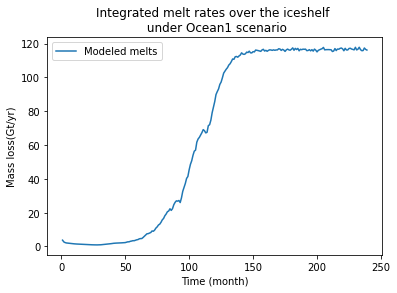

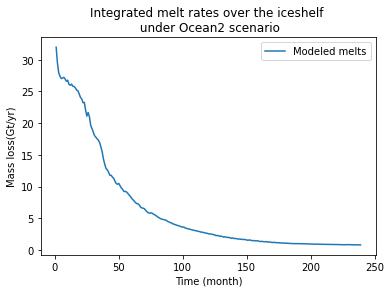

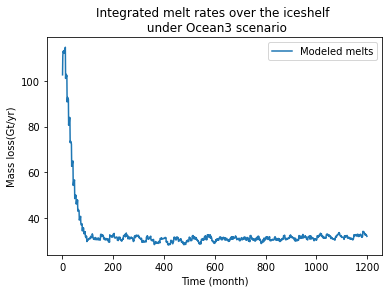

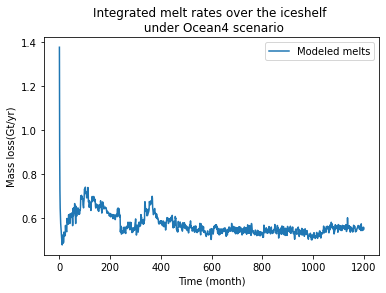

In [11]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
for Oc in OcT:
    Plotting.Plot_Melt_time_function(ind = 0,save = True, Save_name = Oc, Nothing = True, Indep = True, message = 1, Ocean_target = Oc, 
                NN_attributes = {'Epoch' : 8, 'Extra_n' : 'Same_ind', 'Neur' : '0' , 'Ocean' : OcT})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1647892530_Ex_Same_ind']
Data variables used : temperatureYZ salinityYZ iceDraft                                                   
Starting 47 / 239/rStarting 94 / 239/rStarting 141 / 239/rStarting 188 / 239/rStarting 235 / 239/r[5.12373887]
['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1647892530_Ex_Same_ind']
Data variables used : temperatureYZ salinityYZ iceDraft                                                   
Starting 47 / 239/rStarting 94 / 239/rStarting 141 / 239/rStarting 188 / 239/rStarting 235 / 239/r[4.49305391]
['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1647892530_Ex_Same_ind']
Data variables used : temperatureYZ salinityYZ iceDraft                                                   
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[7.070941

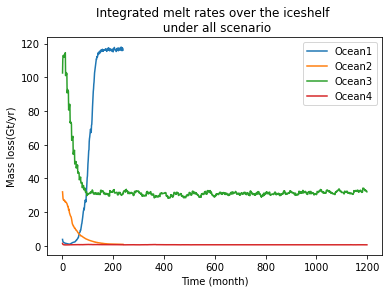

In [13]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
for Oc in OcT:
    Plotting.Plot_Melt_time_function(ind = 0,save = True, Save_name = Oc, Nothing = True, Indep = False, message = 1, Ocean_target = Oc, 
                NN_attributes = {'Epoch' : 8, 'Extra_n' : 'Same_ind', 'Neur' : '0' , 'Ocean' : OcT})

Data variables used : temperatureYZ salinityYZ iceDraft                                                   
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[7.07094149]


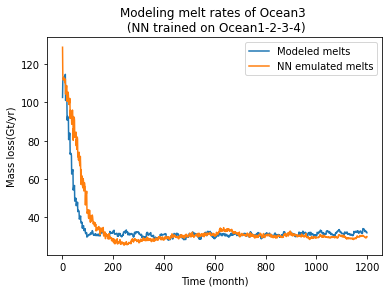

In [15]:
Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 1, Ocean_target = 'Ocean3', 
                NN_attributes = {'Epoch' : 8, 'Extra_n' : 'Same_ind', 'Neur' : '0' , 'Ocean' : OcT})

Data variables used : temperatureYZ salinityYZ iceDraft                                                   
Starting 47 / 239/rStarting 94 / 239/rStarting 141 / 239/rStarting 188 / 239/rStarting 235 / 239/r[5.12373887]


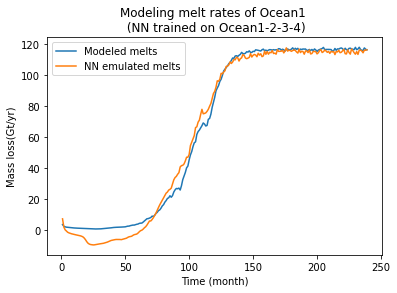

In [16]:
Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 1, Ocean_target = 'Ocean1', 
                NN_attributes = {'Epoch' : 8, 'Extra_n' : 'Same_ind', 'Neur' : '0' , 'Ocean' : OcT})

Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647598617_Ex_Same_ind
Data variables used : temperatureYZ salinityYZ iceDraft
[1.39546559]5 / 1199


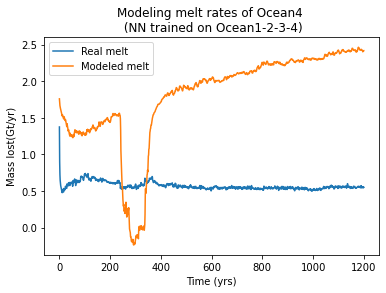

In [85]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
Plotting.Plot_Melt_time_function(save = False, Epoch = 8, message = 1, 
                    Ocean_trained = OcT, Ocean_target = 'Ocean4', NN_attributes = {'Extra_n' : 'Same_ind', 'Cutting' : 'Same_t' })

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind/model_26.h5']
[1.46733163] model Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind/model_26.h5                                                   


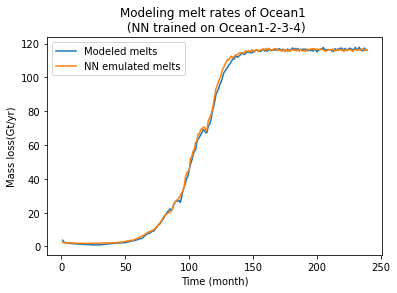

In [4]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
Plotting.Plot_Melt_time_function(save = True, message = 0, ind = 0,
                    Ocean_target = 'Ocean1', NN_attributes = {'Epoch' : 30 , 'Ocean' : OcT, 'Pick_Best' : True, 'Exact' : True})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind/model_26.h5']
[1.43809589] model Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind/model_26.h5                                                   


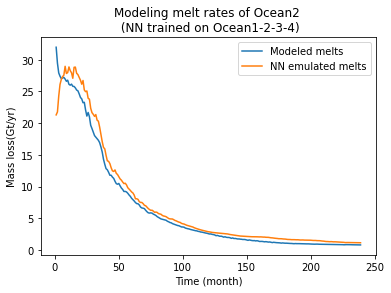

In [5]:
Plotting.Plot_Melt_time_function(save = True, message = 0, ind = 0,
                    Ocean_target = 'Ocean2', NN_attributes = {'Epoch' : 30 , 'Ocean' : OcT, 'Pick_Best' : True, 'Exact' : True})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind/model_26.h5']
[0.98852174] model Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind/model_26.h5                                                   


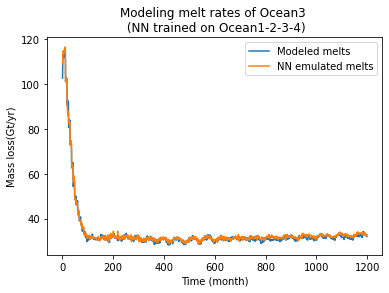

In [6]:
Plotting.Plot_Melt_time_function(save = True, message = 0, ind = 0,
                    Ocean_target = 'Ocean3', NN_attributes = {'Epoch' : 30 , 'Ocean' : OcT, 'Pick_Best' : True, 'Exact' : True})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind/model_26.h5']
[0.46301778] model Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind/model_26.h5                                                   


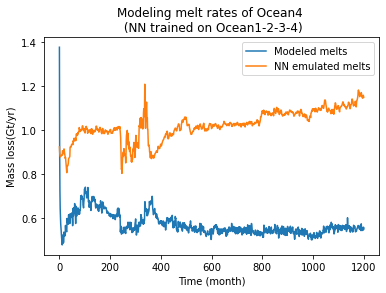

In [7]:
Plotting.Plot_Melt_time_function(save = True, message = 0, ind = 0,
                    Ocean_target = 'Ocean4', NN_attributes = {'Epoch' : 30 , 'Ocean' : OcT, 'Pick_Best' : True, 'Exact' : True})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind']
[0.86395864] model Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind                                                   


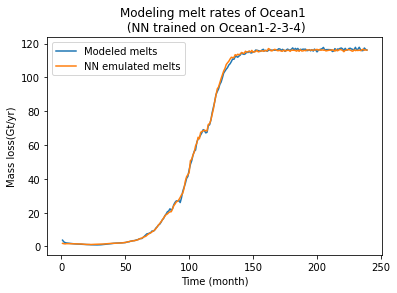

In [8]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
Plotting.Plot_Melt_time_function(save = True, message = 0, ind = 0,
                    Ocean_target = 'Ocean1', NN_attributes = {'Epoch' : 30 , 'Ocean' : OcT, 'Exact' : 1, 'Scaling_lr' : True, 'Pick_Best' : False})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind']
[0.83366278] model Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind                                                   


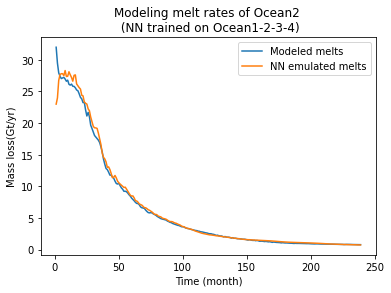

In [9]:
Plotting.Plot_Melt_time_function(save = True, message = 0, ind = 0,
                    Ocean_target = 'Ocean2', NN_attributes = {'Epoch' : 30 , 'Ocean' : OcT, 'Exact' : 1, 'Scaling_lr' : True, 'Pick_Best' : False})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind']
[0.69049352] model Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind                                                   


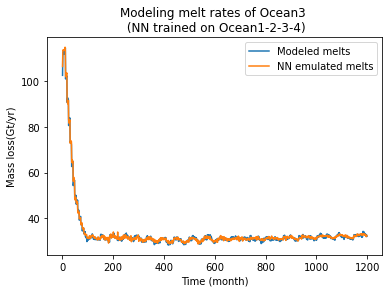

In [10]:
Plotting.Plot_Melt_time_function(save = True, message = 0, ind = 0,
                    Ocean_target = 'Ocean3', NN_attributes = {'Epoch' : 30 , 'Ocean' : OcT, 'Exact' : 1, 'Scaling_lr' : True, 'Pick_Best' : False})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind']
[0.07631557] model Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind                                                   


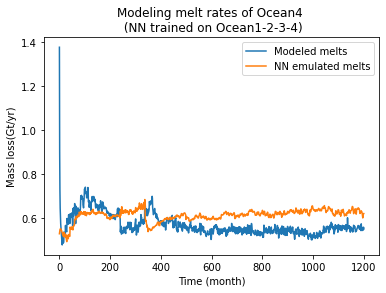

In [11]:
Plotting.Plot_Melt_time_function(save = True, message = 0, ind = 0,
                    Ocean_target = 'Ocean4', NN_attributes = {'Epoch' : 30 , 'Ocean' : OcT, 'Exact' : 1, 'Scaling_lr' : True, 'Pick_Best' : False})

In [40]:
os.getcwd()

'/home/bouissob/Code'

In [19]:
model_p = '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind/'
hist = pd.read_pickle(model_p + '/TrainingHistory')

In [21]:
min(hist['val_mse'])

0.018938330933451653

[4.25729246] model Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind                                                   


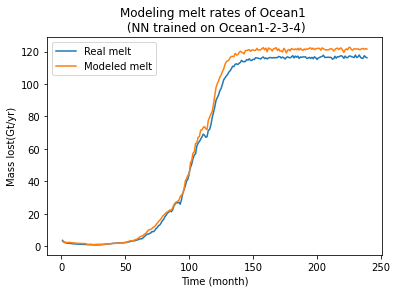

In [37]:
Plotting.Plot_Melt_time_function(save = False, message = 0, ind = 0,
                    Ocean_target = 'Ocean1', NN_attributes = {'Epoch' : 30 , 'Ocean' : OcT, 'Exact' : 1, 'Scaling_lr' : False})

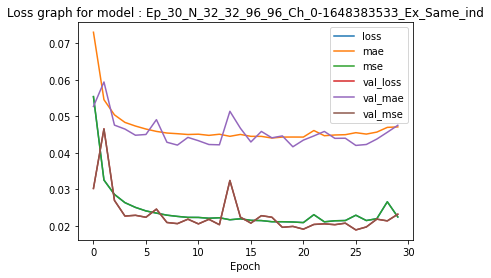

In [39]:
Plotting.Plot_loss_model(ind = 0, Epoch = 30 , Ocean = OcT, Exact = 1, Scaling_lr = False)

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_3
Starting 1/51 model Ep_6_N_1_Ch_0-1646003136
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 2/51 model Ep_4_N_32_64_64_32_Ch_0-1645997060
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 3/51 model Ep_6_N_4_Ch_0-1646003252
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 4/51 model Ep_6_N_8_Ch_0-1646003370
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 5/51 model Ep_6_N_16_Ch_0-1646003488
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 6/51 model Ep_6_N_4_16_Ch_0-1646003607
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 7/51 model Ep_6_N_8_16_Ch_0-1646003735
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 8/51 model Ep_6_N_16_16_Ch_0-1646003862
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 9/51 model Ep_6_N_4_32_Ch_0-1646003992
Data variables used : x y temperat

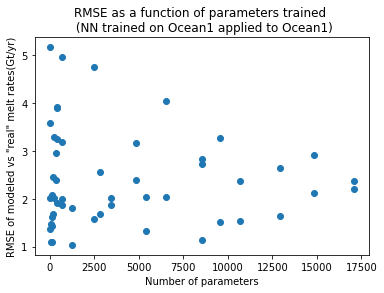

In [16]:
#def Compute_data_for_plotting(Epoch = 14, Ocean_trained = 'Ocean1', Type_trained = 'COM_NEMO-CNRS', 
#             Ocean_target = 'Ocean1', Type_tar = 'COM_NEMO-CNRS', message = 1):
importlib.reload(NN)
Rm, Param, Neur = NN.Plot_RMSE_to_param(save = False, Epoch = 3, Ocean_trained = 'Ocean1', message = 1)

In [6]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '32_32_96_96', 'Ocean' : OcT}
       ,{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Choix' : 0, 'Method_data' : 3},
        {'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Choix' : 0, 'Method_data' : 4, 'index' : 1}
       ]
Titles=['Small data', 'Big data']

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648203773_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648203773_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648198308_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648198308_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648136641_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648136641_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648131277_Ex_Same_ind
Fin

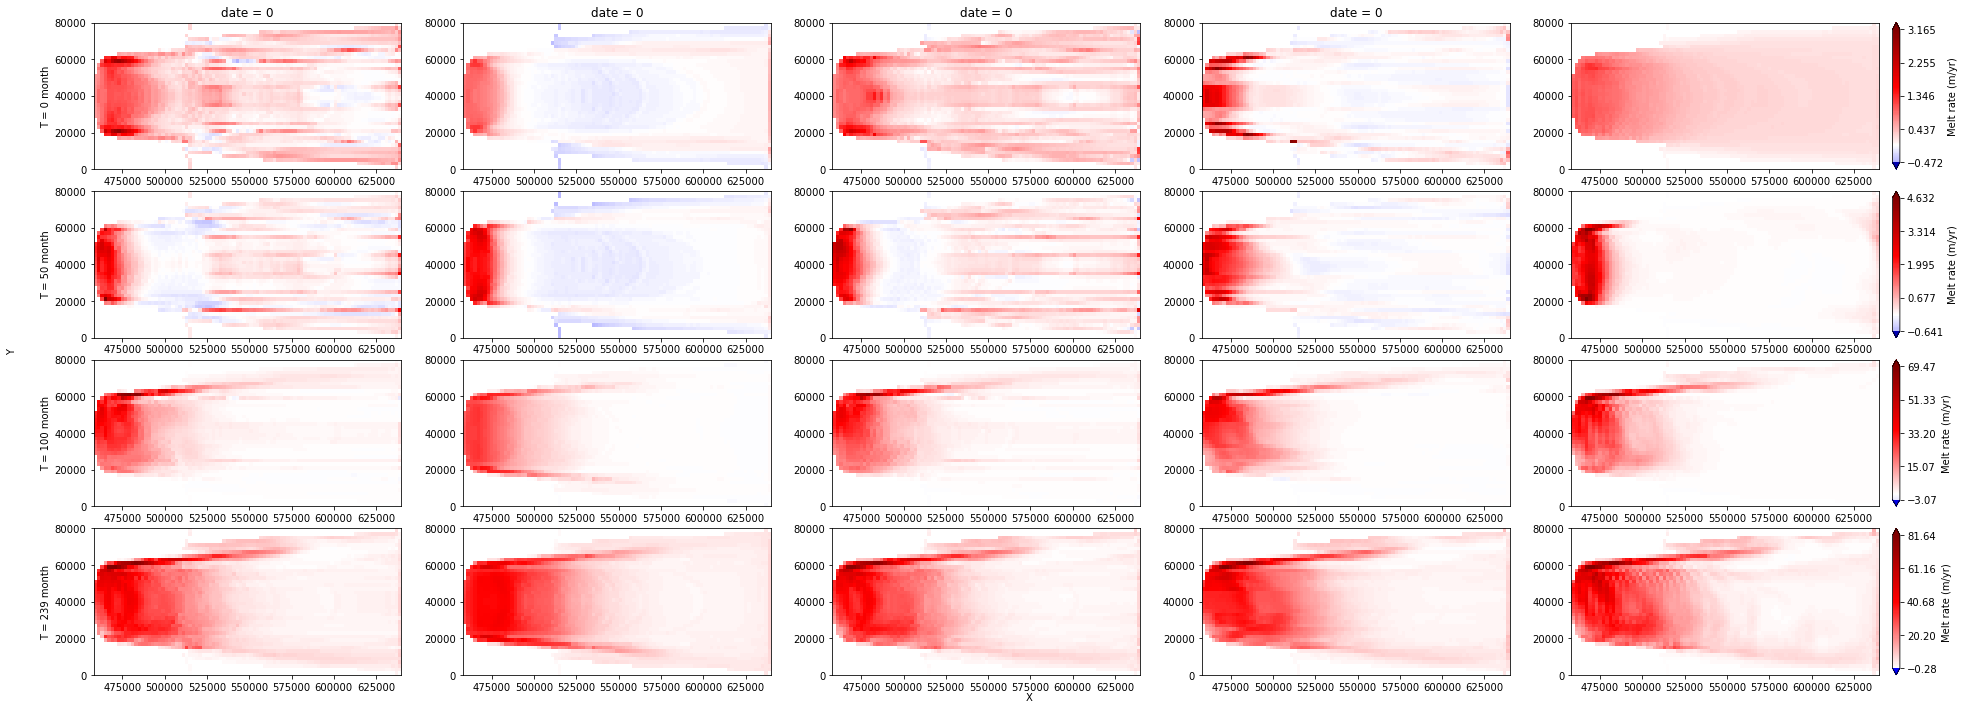

In [16]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Extra_n' : 'Same_ind', 'Method_data' : 1}
       ,{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Method_data' : 2, 'Extra_n' : 'Same_ind'}
        ,{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Method_data' : 3, 'Extra_n' : 'Same_ind'}
        ,{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Method_data' : 4, 'Extra_n' : 'Same_ind', 'index' :1}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
Titles=['Small data', 'Big data']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], Oc_tar = 'Ocean1', save = True, Title = Titles)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind


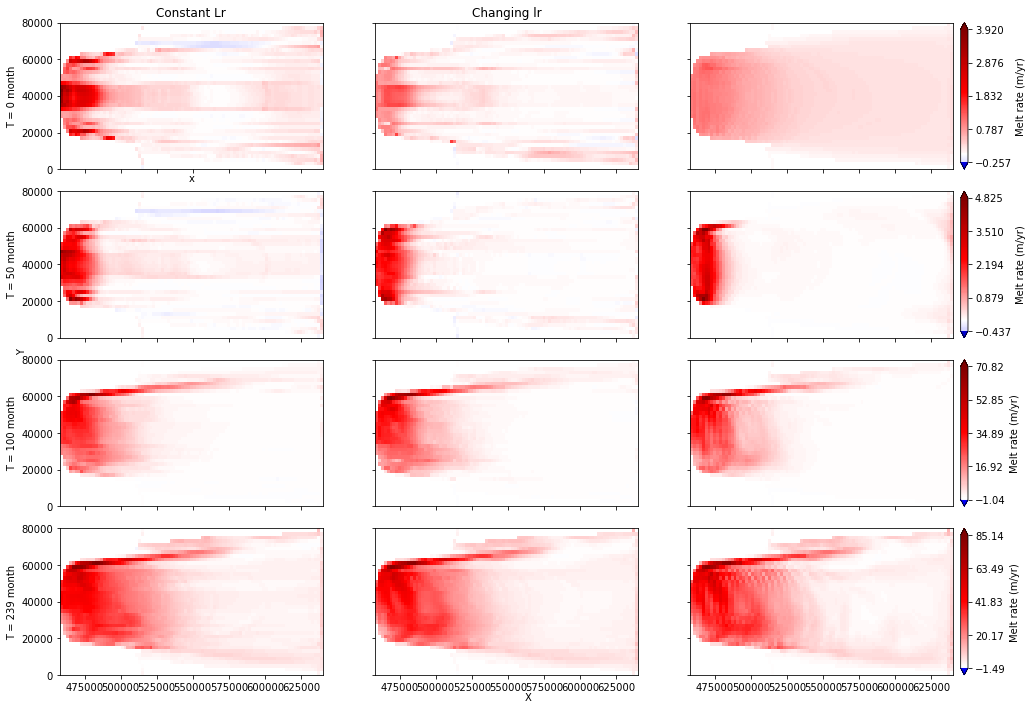

In [6]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 30, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Extra_n' : 'Same_ind', 'Method_data' : 4}
       ,{'Epoch' : 30, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Method_data' : 4, 'Extra_n' : 'Same_ind',
        'Scaling_lr' : True}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
Titles=['Constant Lr', 'Changing lr']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], 
    Oc_tar = 'Ocean1', save = False, Title = Titles, sharing = True)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind


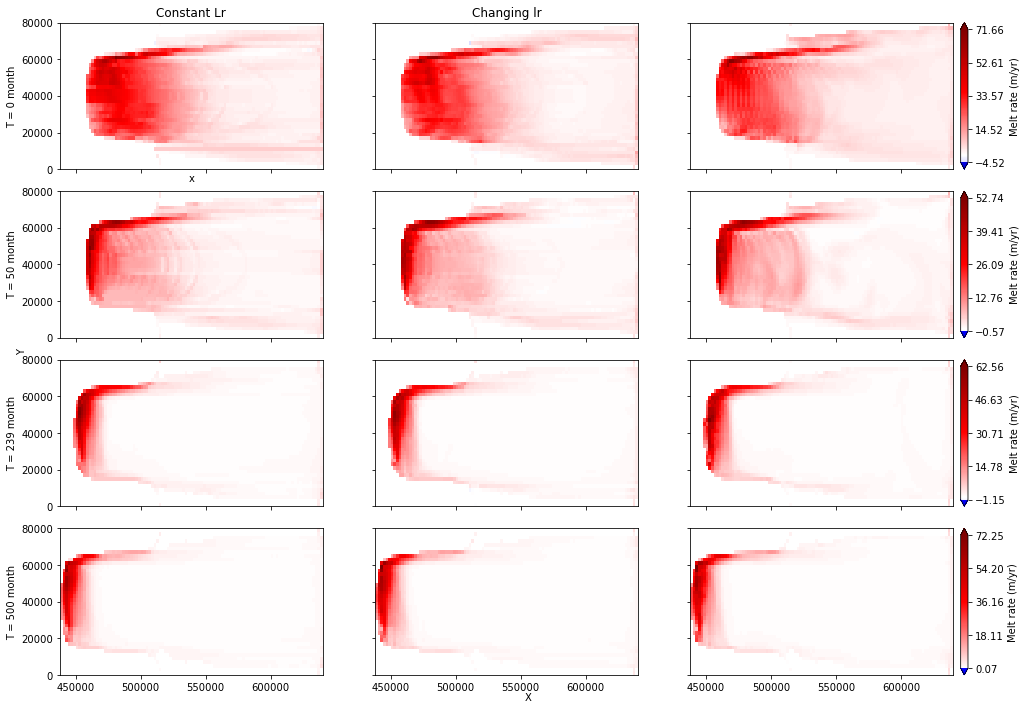

In [7]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)

A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 239, 500], 
    Oc_tar = 'Ocean3', save = False, Title = Titles, sharing = True)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind


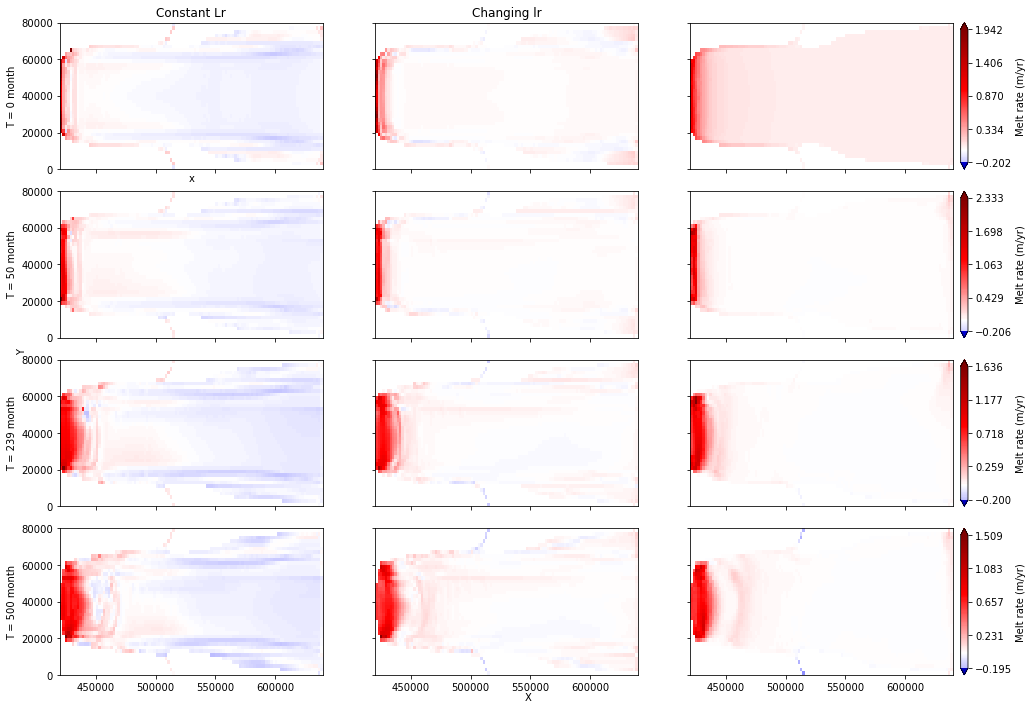

In [8]:
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 239, 500], 
    Oc_tar = 'Ocean4', save = False, Title = Titles, sharing = True)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1648636427_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1648636427_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind


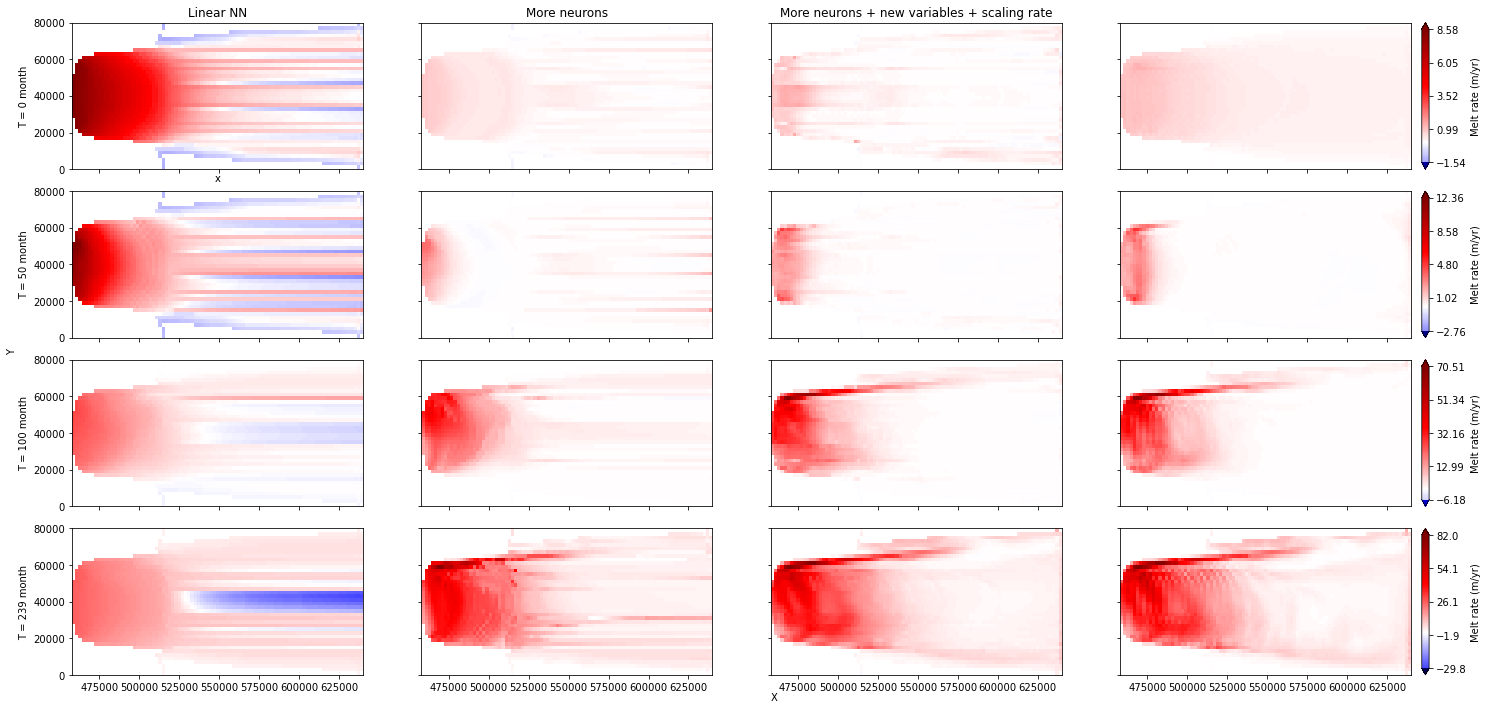

In [33]:
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 8, 'Neur' : '0', 'Ocean' : OcT, 'Extra_n' : 'Same_ind', 'Method_data' : 3}
        , {'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Extra_n' : 'Same_ind', 'Var' : ['temperatureYZ', 'salinityYZ', 'iceDraft'], 'Method_data' : 3}
       ,{'Epoch' : 30, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Method_data' : 4, 'Extra_n' : 'Same_ind',
        'Scaling_lr' : True}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
Titles=['Linear NN', 'More neurons' ,'More neurons + new variables + scaling rate']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], 
    Oc_tar = 'Ocean1', save = True, Title = Titles, sharing = True)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1648636427_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1648636427_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind


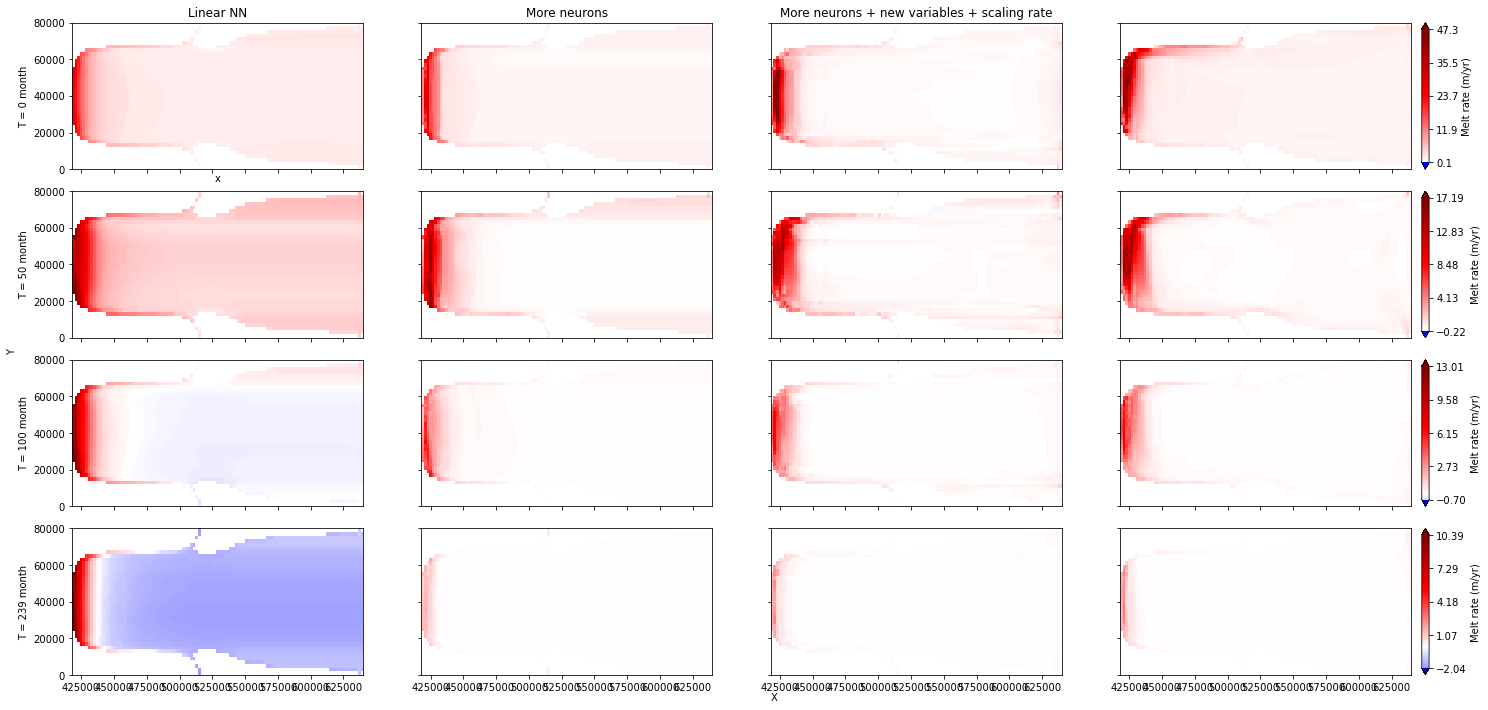

In [41]:
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], 
    Oc_tar = 'Ocean2', save = True, Title = Titles, sharing = True)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1648636427_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1648636427_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind


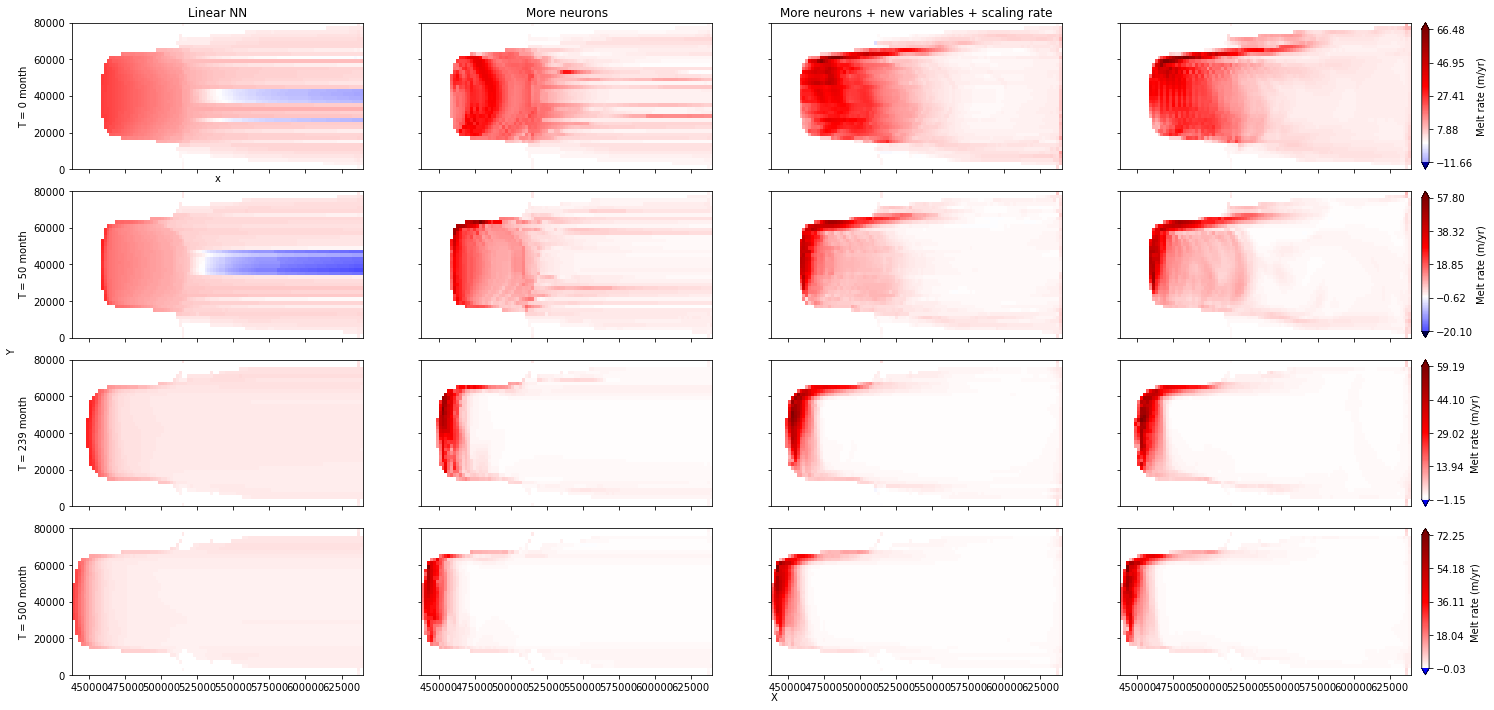

In [40]:
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 239, 500], 
    Oc_tar = 'Ocean3', save = True, Title = Titles, sharing = True)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1648636427_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1648636427_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind


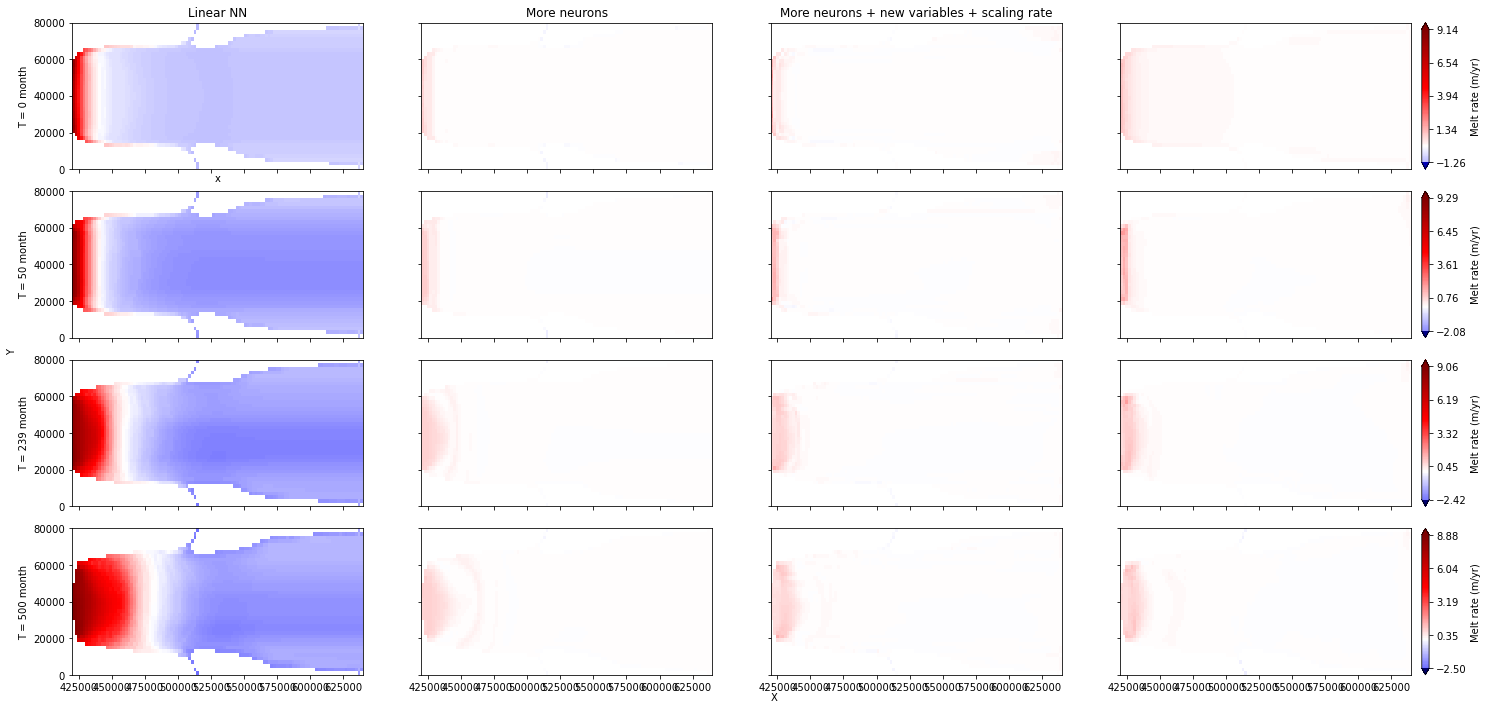

In [39]:
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 239, 500], 
    Oc_tar = 'Ocean4', save = True, Title = Titles, sharing = True)

[0.91208497] model Ep_8_N_32_32_96_96_Ch_0-1648131277_Ex_Same_ind                                                   


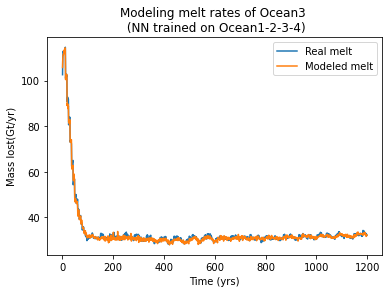

In [24]:
Plotting.Plot_Melt_time_function(ind = 1,save = True, message = 0, Ocean_target = 'Ocean3', 
                NN_attributes = {'Epoch' : 8, 'Extra_n' : 'Same_ind', 'Method_data' : 4 , 'Ocean' : OcT})

[0.16342232] model Ep_8_N_32_32_96_96_Ch_0-1648131277_Ex_Same_ind                                                   


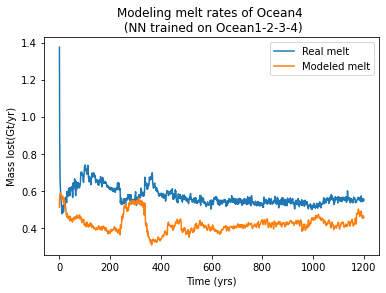

In [21]:
Plotting.Plot_Melt_time_function(ind = 1,save = True, message = 0, Ocean_target = 'Ocean4', 
                NN_attributes = {'Epoch' : 8, 'Extra_n' : 'Same_ind', 'Method_data' : 4 , 'Ocean' : OcT})

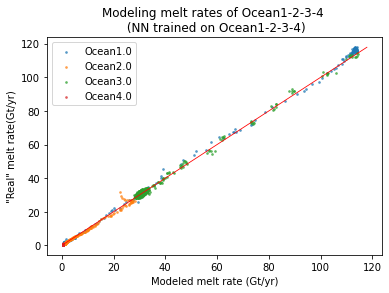

In [6]:
importlib.reload(Plotting)
importlib.reload(Trainings)
importlib.reload(Computing_functions)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = True, 
            message = 0, Ocean_target = OcT, index = 1, NN_attributes = {'Epoch' : 8, 'Method_data' : 4, 
                                                'Extra_n' : 'Same_ind', 'Ocean' : OcT})

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1646930860_Ex_
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1646930860_Ex_
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648136641_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648136641_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648131277_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648131277_Ex_Same_ind


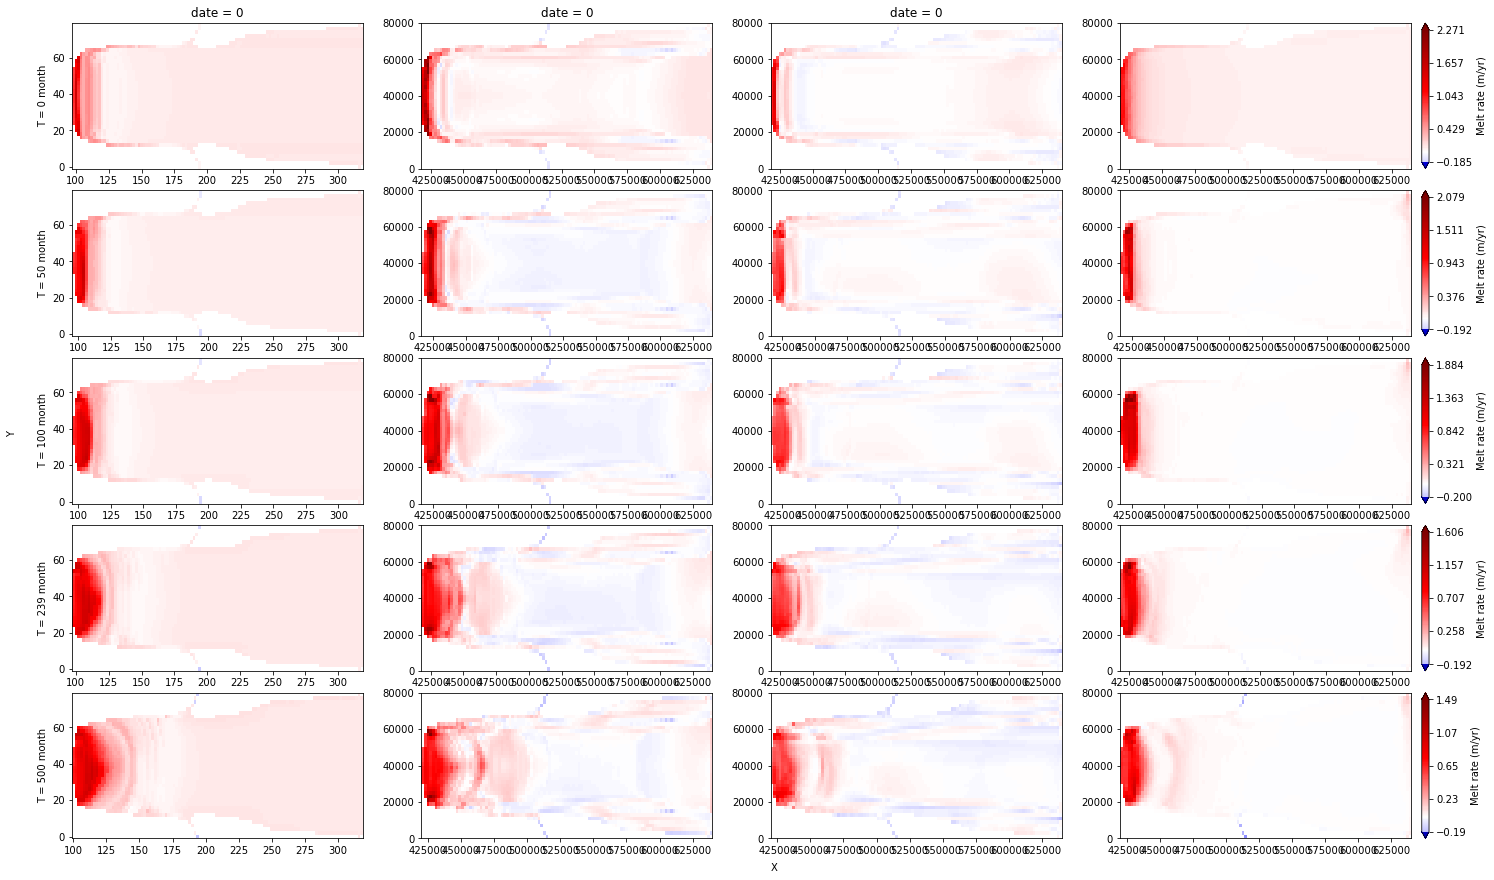

In [7]:
importlib.reload(Plotting)
importlib.reload(Trainings)
importlib.reload(Computing_functions)
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 500], Oc_tar = 'Ocean4', 
                save = True, Title = Titles, sharing = False)

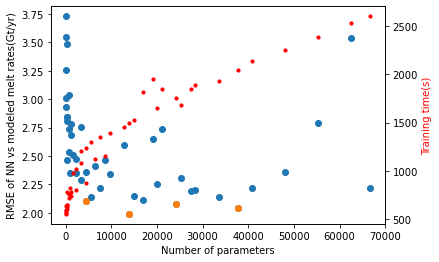

In [18]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
Mod_att = {'Epoch' :8, 'Var' : Var_X_non_position, 
        'Extra_n' : 'Same_ind', 'Ocean' : OcT, 'Choix' : 0}
Param, RMSE, Neur, T = Plotting.Plot_total_RMSE_param(save = True, Ocean_target = OcT, message = 0, Time = True
                , NN_attributes = Mod_att, load = True, See_best = True)

In [16]:
Bests = RMSE.argsort()[:4]
print(Neur[Bests])
print(RMSE[Bests])


['32_32_96_96' '96_96_96_96_96' '64_64_64_96_96' '32_32_32_64']
[1.99043913 2.04365121 2.07542008 2.10510138]


In [ ]:
importlib.reload(NN)
NN.Plot_total_RMSE_param(save = True, Ocean_target = OcT, Epoch = 8, Ocean_trained = OcT, message = 0, Time = True
                , NN_attributes = {'Var' : Var_X_non_position, 'Extra_n' : 'Same_ind'})

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4


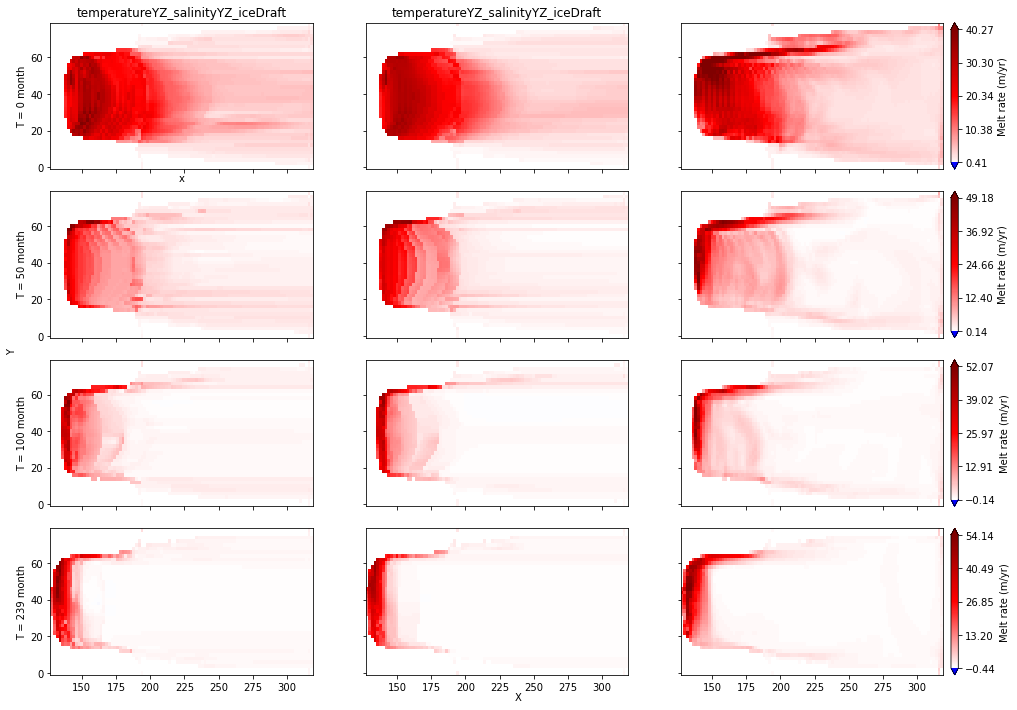

In [38]:
#importlib.reload(NN)
#A = NN.plot_N_side(NN.model_NN, Mods, ind = 0, T = [0, 50, 239])

#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]

A = Plotting.plot_N_side(NN.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], Oc_tar = 'Ocean3', save = False)

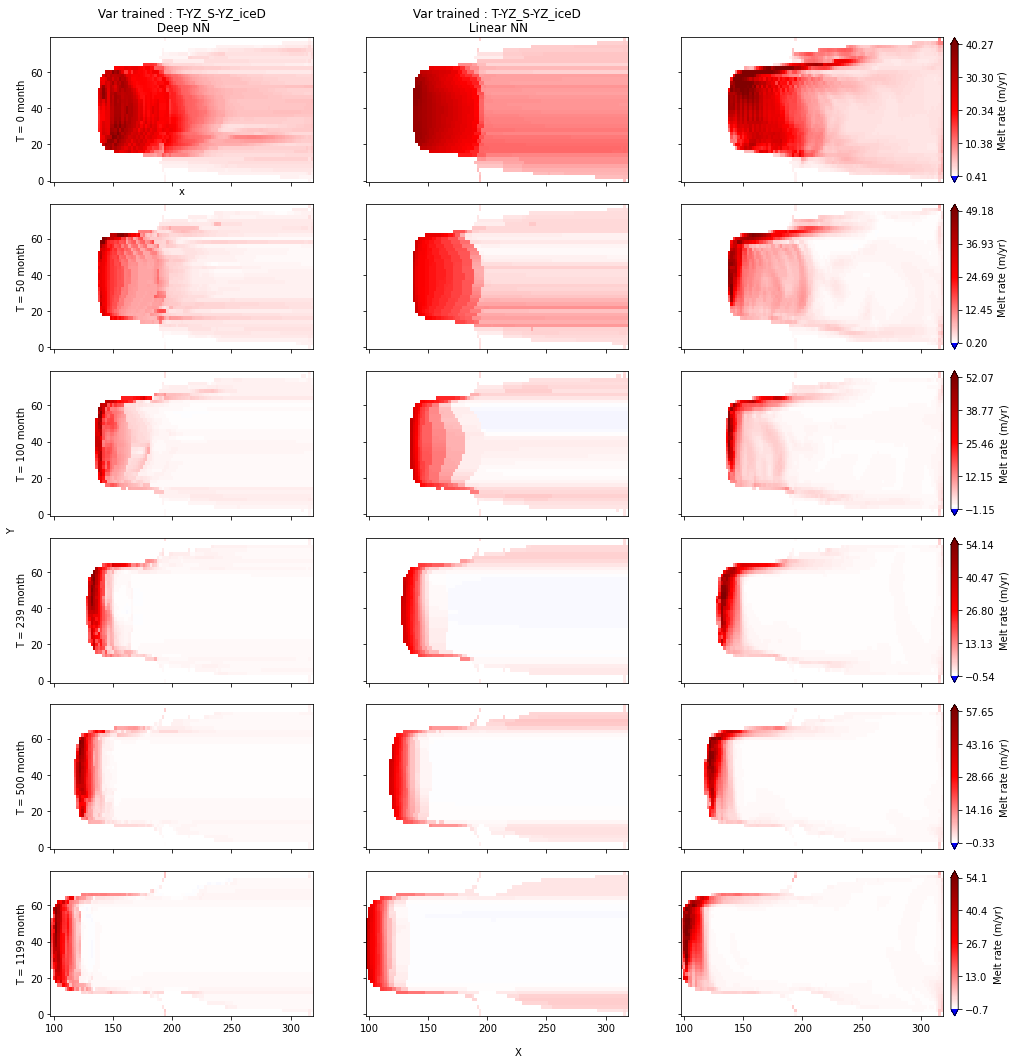

In [18]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '64_64_64_96_96', 'Ocean' : OcT}
       ,{'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '0', 'Ocean' : OcT}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
Titles=['Deep NN', 'Linear NN']
A = Plotting.plot_N_side(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 500, 1199], 
                        Oc_tar = 'Ocean3', save = True, Title = Titles)

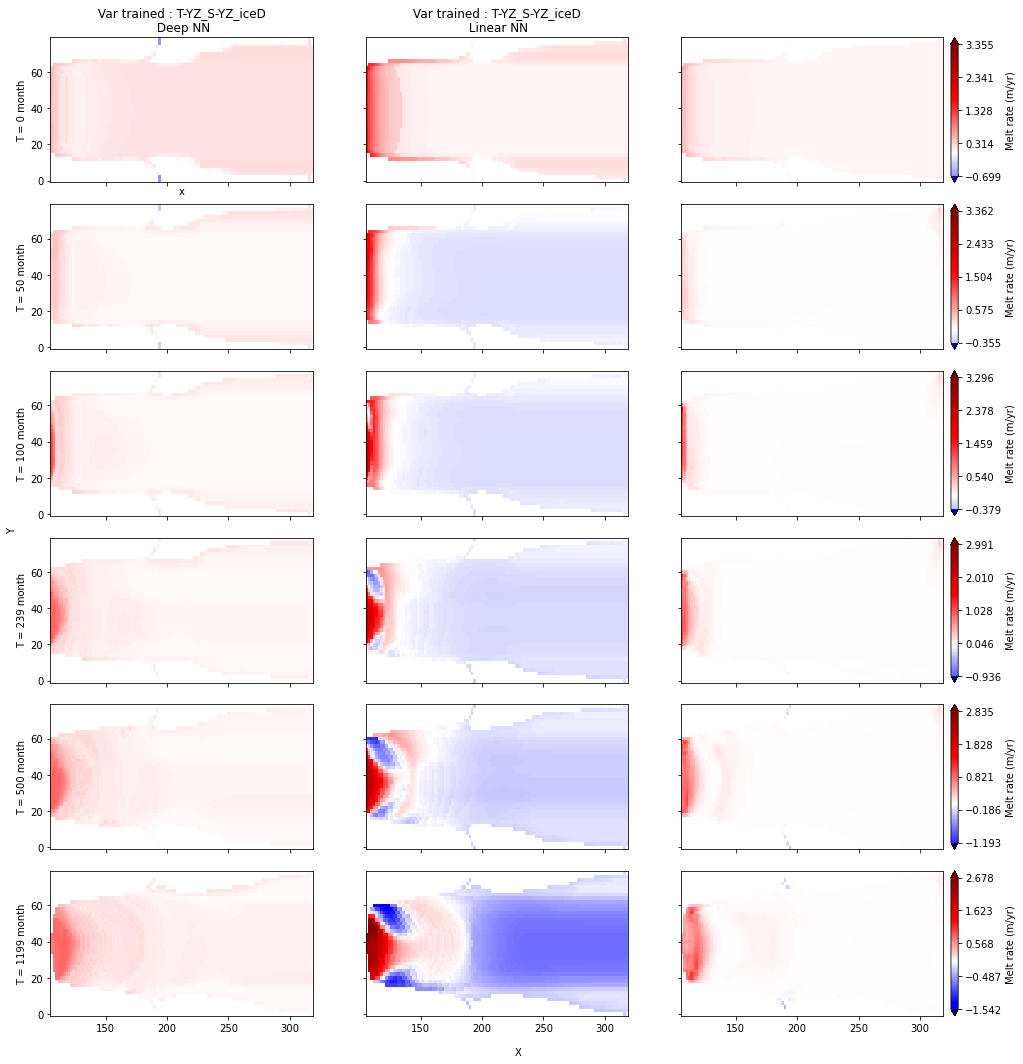

In [19]:
A = Plotting.plot_N_side(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 500, 1199], 
                        Oc_tar = 'Ocean4', save = True, Title = Titles)

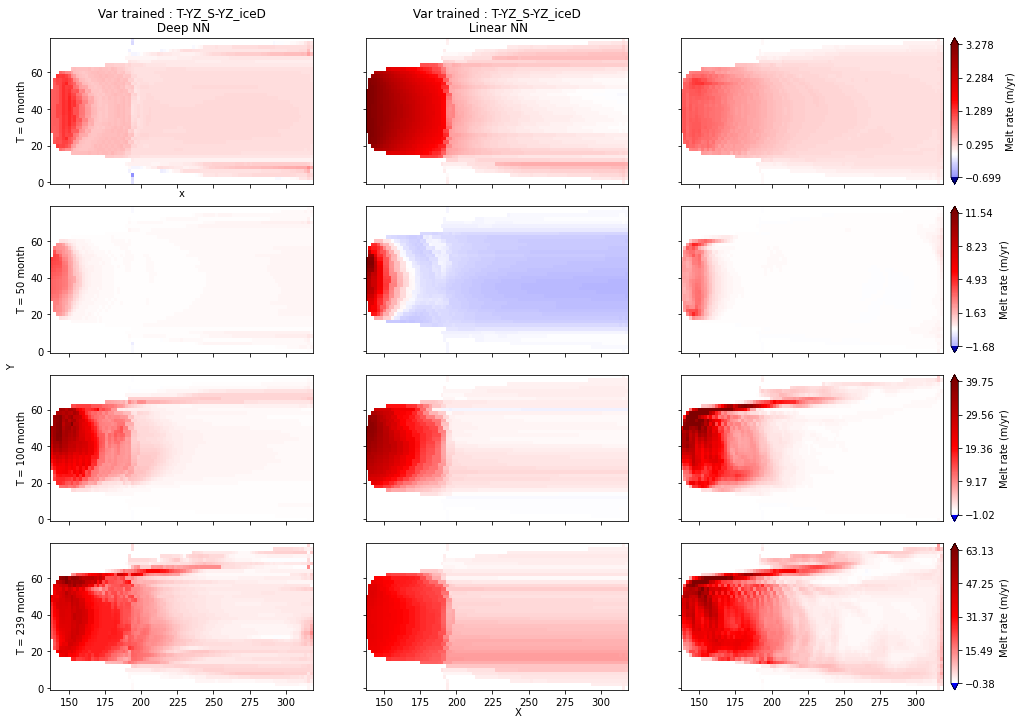

In [20]:
A = Plotting.plot_N_side(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], 
                        Oc_tar = 'Ocean1', save = True, Title = Titles)

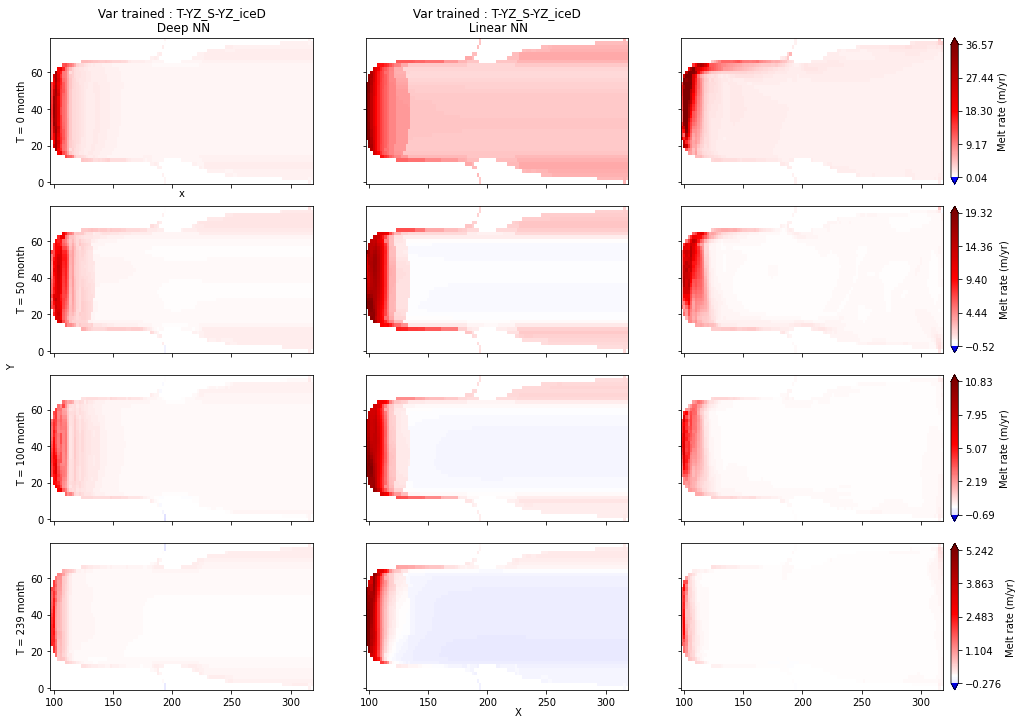

In [21]:
A = Plotting.plot_N_side(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], 
                        Oc_tar = 'Ocean2', save = True, Title = Titles)